# i. Perkenalan
Nama        : Nadia Nabilla Shafira

Batch       : HCK-009

Objectives  : Project ini bertujuan untuk memprediksi bagaimana resiko seseorang terdiagnosis penyakit jantung atau tidak berdasarkan beberapa faktor menggunakan model terbaik di antara KNN, SVM, Decision Tree, Random Forest, dan AdaBoosting.

Deployment  : https://huggingface.co/spaces/nadianshafira/Heart-Disease-Prediction

---

# ii. Import Libraries

In [1]:
import pandas as pd
import numpy as np

# Exploratory Data Analysis
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
from phik.report import plot_correlation_matrix

# Feature Engineering
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Data Modeling
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model Evaluation
from sklearn.metrics import make_scorer, classification_report, recall_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV

# Model Saving
import pickle

# Others
import warnings
warnings.filterwarnings('ignore')

---

# iii. Data Loading

Data yang digunakan merupakan data cardiovascular diseases risk prediction yang diperoleh dari Kaggle (https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset) dan kemudian disimpan dalam bentuk csv. Berikut merupakan informasi dari kolom pada dataset ini:

| Kolom  | Deskripsi |
|-------|-----|
| `General_Health`  | status kesehatan secara keseluruhan seseorang  |
| `Checkup` | waktu terakhir kali melakukan pemeriksaan  |
| `Exercise`  | aktivitas fisik/olahraga  <br><br> `No` : tidak olahraga <br> `Yes` : olahraga  |
| `Heart_Disease`  | mengidap penyakit jantung <br><br> `No` : tidak mengidap penyakit jantung <br> `Yes` : mengidap penyakit jantung |
| `Skin_Cancer` | mengidap kanker kulit <br><br> `No` : tidak mengidap kanker kulit <br> `Yes` : mengidap kanker kulit  |
| `Other_Cancer`  | mengidap kanker (selain kanker kulit) <br><br> `No` : tidak mengidap kanker (selain kanker kulit) <br> `Yes` : mengidap kanker (selain kanker kulit)  |
| `Depression`  | mengidap depresi <br><br> `No` : tidak mengidap depresi <br> `Yes` : mengidap depresi  |
| `Diabetes` | mengidap diabetes <br><br> `No` : tidak mengidap diabetes <br> `Yes` : mengidap diabetes  |
| `Arthritis`  | mengidap arthritis <br><br> `No` : tidak mengidap arthritis <br> `Yes` : mengidap arthritis  |
| `Sex`  | jenis kelamin  |
| `Age_Category` | kategori usia  |
| `Weight_(kg)`  | berat badan  |
| `Height_(cm)`  | tinggi badan  |
| `BMI` | index massa tubuh  |
| `Smoking_History`  | riwayat merokok <br><br> `No` : tidak pernah merokok <br> `Yes` : pernah merokok  |
| `Alcohol_Consumption`  | konsumsi alkohol  |
| `Fruit_Consumption`  | konsumsi buah  |
| `Green_Vegetables_Consumption`  | konsumsi sayur hijau  |
| `FriedPotato_Consumption`  | konsumsi kentang goreng  |

In [2]:
# load data
df = pd.read_csv('P1M2_nadia_nabilla.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


Tabel di atas merupakan 5 data pertama dari data Cardiovascular Disease.

In [3]:
# duplicate dataset
dfDuplicate = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

Berdasarkan informasi di atas, dapat dilihat bahwa dataset ini memiliki 308854 entries dengan 19 kolom. Selain itu beberapa kolom bertipe data string (object) dan float. Output di atas juga menunjukkan bahwa tidak terdapat missing values pada dataset ini karena banyaknya rows pada masing-masing kolom adalah 308854.

## Data Cleaning

### Data Duplicate Detection & Handling

In [7]:
# data duplicate detection
df[df.duplicated()]

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
46402,Good,Within the past year,Yes,No,No,No,Yes,No,No,Female,18-24,163.0,81.65,30.90,No,0.0,60.0,4.0,4.0
49287,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,35-39,160.0,72.57,28.34,Yes,0.0,60.0,30.0,4.0
75448,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,163.0,61.23,23.17,Yes,0.0,30.0,16.0,0.0
76857,Excellent,Within the past year,Yes,No,No,No,No,No,No,Male,40-44,173.0,81.65,27.37,No,0.0,30.0,8.0,1.0
78871,Good,Within the past year,Yes,No,No,No,No,No,No,Female,75-79,163.0,58.97,22.31,No,0.0,60.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301474,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,70-74,173.0,77.11,25.85,No,0.0,30.0,30.0,0.0
303040,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,55-59,168.0,74.84,26.63,No,0.0,30.0,30.0,4.0
303600,Good,Within the past year,Yes,No,No,No,No,No,No,Female,35-39,157.0,72.57,29.26,No,0.0,4.0,12.0,4.0
303609,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,70-74,160.0,58.97,23.03,No,0.0,30.0,4.0,4.0


Berdasarkan output di atas, terdapat 80 rows data duplikat. Oleh karena itu, data duplikat tersebut akan dihapus.

In [6]:
# data duplicate handling
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

In [7]:
df.shape

(308774, 19)

Setelah menghapus data duplikat, kini banyaknya entries adalah 308774.

### Missing Value Detection & Handling

In [8]:
df[df.isnull().any(axis=1)]

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption


Berdasarkan output di atas, dapat dilihat bahwa tidak terdapat missing value pada dataset ini.

### Rename Column Names

In [9]:
df = df.rename(columns={'Height_(cm)': 'Height',         #mengubah nama kolom 'Height_(cm)' menjad 'Height'
                        'Weight_(kg)': 'Weight'})        #mengubah nama kolom 'Weight_(kg)' menjadi 'Weight'
df.head(1)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height,Weight,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0


### Rename Value of Categorical Column

In [10]:
# check unique value
print(df['General_Health'].unique())
print(df['Checkup'].unique())
print(df['Exercise'].unique())
print(df['Heart_Disease'].unique())
print(df['Skin_Cancer'].unique())
print(df['Other_Cancer'].unique())
print(df['Depression'].unique())
print(df['Diabetes'].unique())
print(df['Arthritis'].unique())
print(df['Sex'].unique())
print(df['Age_Category'].unique())
print(df['Smoking_History'].unique())

['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
['Yes' 'No']
['Female' 'Male']
['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']
['Yes' 'No']


Berdasarkan informasi di atas, pada kolom `Diabetes` terdapat 4 unique values, di mana sebenarnya dari 4 unique values tersebut dapat diartikan menjadi 2 nilai saja, yaitu `Yes` dan `No`

In [11]:
# kolom diabetes
df['Diabetes'].replace(['No, pre-diabetes or borderline diabetes', 'Yes, but female told only during pregnancy'],
                       ['No', 'Yes'],inplace=True)
df['Diabetes'].unique()

array(['No', 'Yes'], dtype=object)

---

# iv. Exploratory Data Analysis

## Analisis Kolom Numerik

In [12]:
num = df[['Height', 'Weight', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']]

### Statistik Deskriptif

In [13]:
df.describe()

,Height,Weight,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000
mean,170.615220,83.590399,28.626813,5.097557,29.834290,15.109517,6.297237
std,10.658452,21.344664,6.522810,8.200434,24.877812,14.926912,8.583837
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


Output di atas menunjukkan statistik deskriptif dari data yang dimiliki. Dapat dilihat bahwa kebanyakan kolom memiliki nilai maksimum jauh di atas Q3, hal ini merupakan indikasi adanya outlier dalam data.

### Distribusi Data

Height                          0.015299
Weight                          1.058094
BMI                             1.376446
Alcohol_Consumption             1.885252
Fruit_Consumption               1.248441
Green_Vegetables_Consumption    2.415908
FriedPotato_Consumption         4.911884
dtype: float64


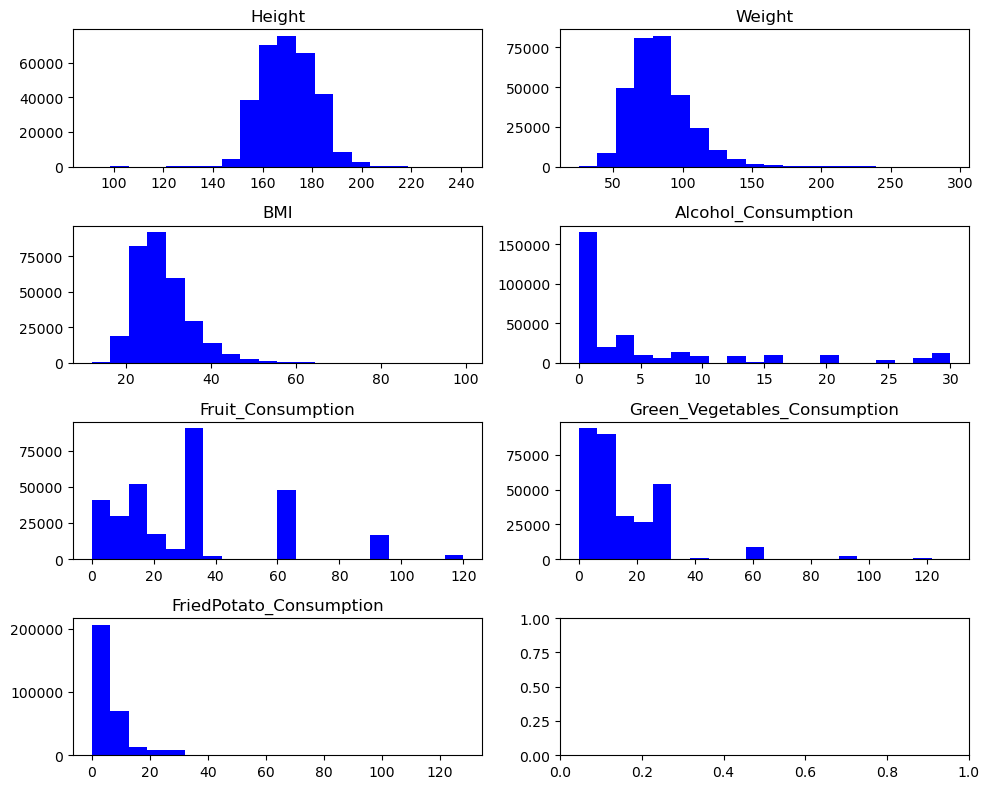

In [14]:
skewness = num.apply(lambda x: skew(x.dropna()))
print(skewness)

fig, axs = plt.subplots(4, 2, figsize = (10, 8))
axs = axs.flatten()

for i, col in enumerate(num):
    axs[i].hist(num[col], color='blue', bins = 20)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

Berdasakan nilai skewness dan histogram dari kolom-kolom di atas, dapat dilihat bahwa distribusi dari kolom-kolom tersebut adalah sebagai berikut:

| Kolom  | Distribusi |
|-------|-----|
| `Height`  | mendekati normal  |
| `Weight` | miring positif  |
| `BMI`  | miring positif  |
| `Alcohol_Consumption`  | miring positif  |
| `Fruit_Consumption`  | miring positif  |
| `Green_Vegetables_Consumption`  | miring positif  |
| `FriedPotato_Consumption`  | miring positif  |

## Analisis Kolom Kategorik

### Heart Disease

[Text(0, 0, '283803'), Text(0, 0, '24971')]

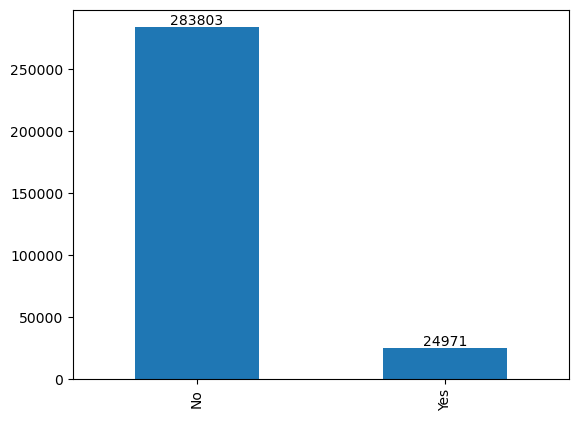

In [15]:
dfCount = df['Heart_Disease'].value_counts().plot(kind='bar')
dfCount.bar_label(dfCount.containers[0])

Berdasarkan bar chart di atas, dapat dilihat bahwa dari 308774 data, terdapat 283803 orang memiliki tidak mengidap penyakit jantung (91.9%), dan 24971 lainnya mengidap penyakit jantung (8.1%). Perbandingan antara orang yang mengidap penyakit jantung dan tidak mengidap penyakit cukup jauh, hal ini mengindikasikan data yang dimiliki imbalanced.

### Checkup

[Text(0, 0, '239295'),
 Text(0, 0, '37210'),
 Text(0, 0, '17442'),
 Text(0, 0, '13420'),
 Text(0, 0, '1407')]

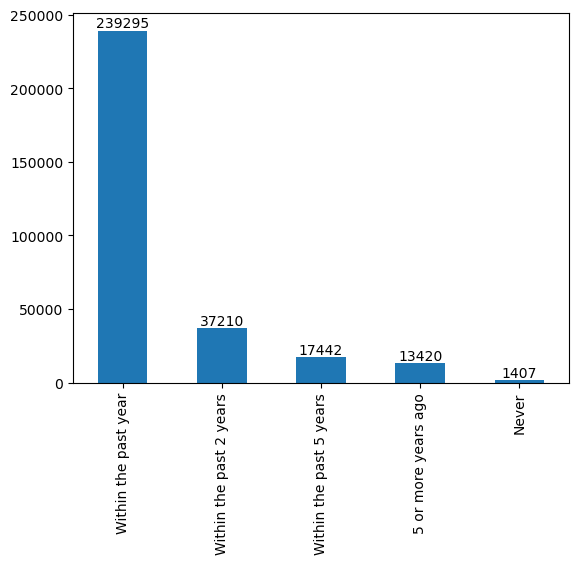

In [16]:
CUCount = df['Checkup'].value_counts().plot(kind='bar')
CUCount.bar_label(CUCount.containers[0])

Berdasarkan bar chart di atas, dapat dilihat bahwa dari 308774 data, terdapat 239295 orang memiliki melakukan pemeriksaan dalam 1 tahun terakhir, 37210 melakukan pemeriksaan dalam 2 tahun terakhir, 17442 dalam 5 tahun terakhir, 13420 lebih dari 5 tahun terakhir, dan 1407 sisanya tidak pernah melakukan pemeriksaan.

### Heart Disease berdasarkan Exercise

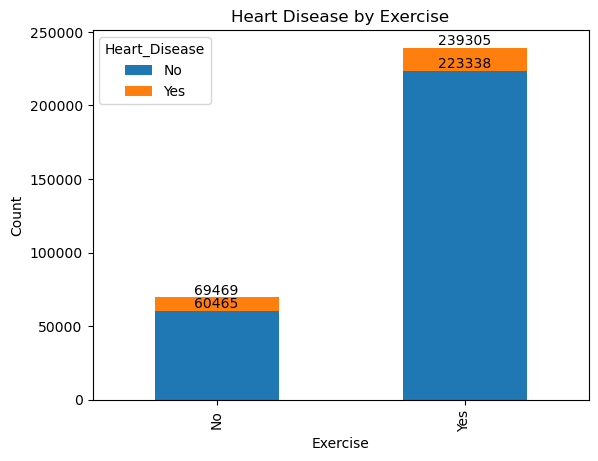

In [17]:
ECount = df.groupby(['Exercise', 'Heart_Disease']).size().unstack()

ax = ECount.plot(kind='bar', stacked=True)

# menambah label untuk masing-masing segmen
for container in ax.containers:
    ax.bar_label(container)

# mengatur judul barchart, label x, dan label y
ax.set_xlabel('Exercise')
ax.set_ylabel('Count')
ax.set_title('Heart Disease by Exercise')

plt.show()

In [18]:
ECount

Heart_Disease,No,Yes
Exercise,,
No,60465,9004
Yes,223338,15967


> Berdasarkan stacked bar chart di atas, dapat dilihat bahwa sebanyak 60465 dari 69469 orang yang tidak berolahraga, atau 87%, tidak mengidap penyakit jantung, dan sisanya mengidap penyakit jantung. Sedangkan mereka yang berolahraga, sebanyak 223338 dari 239305, atau 93.3%, tidak mengidap penyakit jantung, dan sisanya mengidap penyakit jantung.

Berdasarkan perbandingan seseorang berolahraga atau tidak, persentase mereka yang tidak mengidap penyakit jantung lebih tinggi adalah mereka yang berolahraga.

### Heart Disease berdasarkan General Health

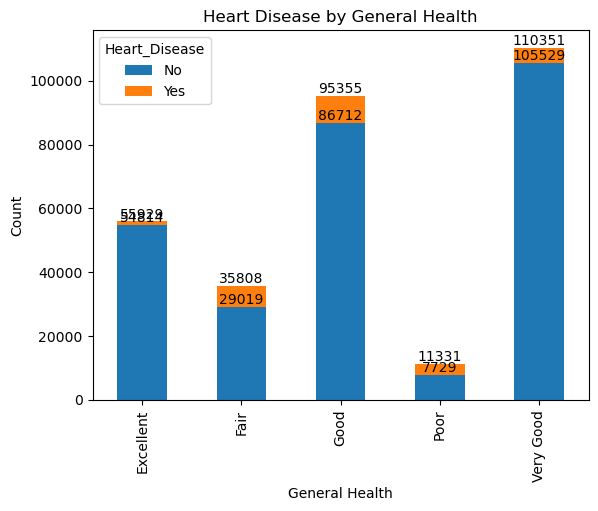

In [19]:
GHCount = df.groupby(['General_Health', 'Heart_Disease']).size().unstack()

ax = GHCount.plot(kind='bar', stacked=True)

# menambah label untuk masing-masing segmen
for container in ax.containers:
    ax.bar_label(container)

# mengatur judul barchart, label x, dan label y
ax.set_xlabel('General Health')
ax.set_ylabel('Count')
ax.set_title('Heart Disease by General Health')

plt.show()

In [20]:
GHCount

Heart_Disease,No,Yes
General_Health,,
Excellent,54814,1115
Fair,29019,6789
Good,86712,8643
Poor,7729,3602
Very Good,105529,4822


> Berdasarkan stacked bar chart di atas, dapat dilihat bahwa sebanyak 54814 dari 55929 orang dengan status kesehatan `Excellent`, atau 98%, tidak mengidap penyakit jantung, dan sisanya mengidap penyakit jantung. Adapun orang dengan status kesehatan `Fair`, terdapat 29019 dari 35808 (81%) dari mereka yang tidak mengidap penyakit jantung, dan sisanya mengidap penyakit jantung. Sedangkan untuk yang status kesehatannya `Good`, sebanyak 86712 dari 95355, atau 90.9%, orang tidak mengidap penyakit jantung, dan sisanya mengidap penyakit jantung. Selain itu, terdapat 7729 dari 11331 (68.2%) orang dengan status kesehatan `Poor` tidak menderita penyakit jantung, dan sisanya menderita penyakit jantung. Dan terdapat 105529 dari 110351 yang status kesehatannya `Very Good` (95.63%) tidak mengidap penyakit jantung, dan sisanya mengidap penyakit jantung.

Berdasarkan perbandingan status kesehatan di atas, persentase mereka yang tidak mengidap penyakit jantung tertinggi adalah mereka yang berstatus `Excellent`, kemudian yang tertinggi kedua adalah `Very Good`, yang ketiga adala `Good`, berikutnya adalah `Fair`, dan yang terakhir adalah `Poor`. Hal ini menunjukkan bahwa semakin baik status kesehatan seseorang, maka persentase untuk tidak mengidap penyakit jantung pun semakin tinggi.

### Heart Disease berdasarkan Skin Cancer

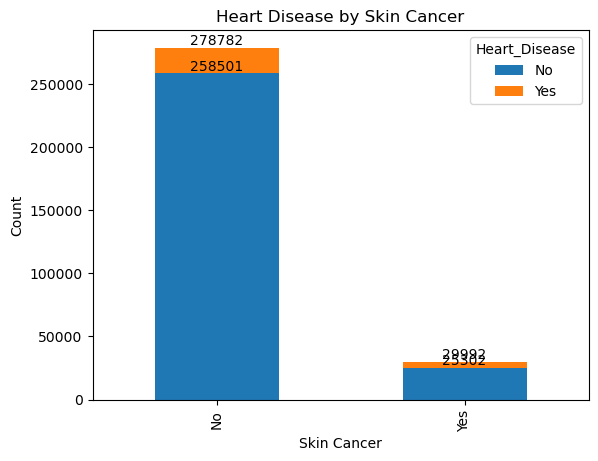

In [21]:
SCCount = df.groupby(['Skin_Cancer', 'Heart_Disease']).size().unstack()

ax = SCCount.plot(kind='bar', stacked=True)

# menambah label untuk masing-masing segmen
for container in ax.containers:
    ax.bar_label(container)

# mengatur judul barchart, label x, dan label y
ax.set_xlabel('Skin Cancer')
ax.set_ylabel('Count')
ax.set_title('Heart Disease by Skin Cancer')

plt.show()

In [22]:
SCCount

Heart_Disease,No,Yes
Skin_Cancer,,
No,258501,20281
Yes,25302,4690


> Berdasarkan stacked bar chart di atas, dapat dilihat bahwa sebanyak 258501 dari 278782 orang yang tidak mengidap kanker kulit, atau 92.72%, tidak mengidap penyakit jantung, dan sisanya mengidap penyakit jantung. Sedangkan mereka yang mengidap kanker kulit, sebanyak 25302 dari 29992, atau 84.36%, tidak mengidap penyakit jantung, dan sisanya mengidap penyakit jantung.

Berdasarkan perbandingan seseorang mengidap kanker kulit atau tidak, persentase mereka yang tidak mengidap penyakit jantung lebih tinggi adalah mereka yang tidak mengidap kanker kulit.

### Heart Disease berdasarkan Other Cancer

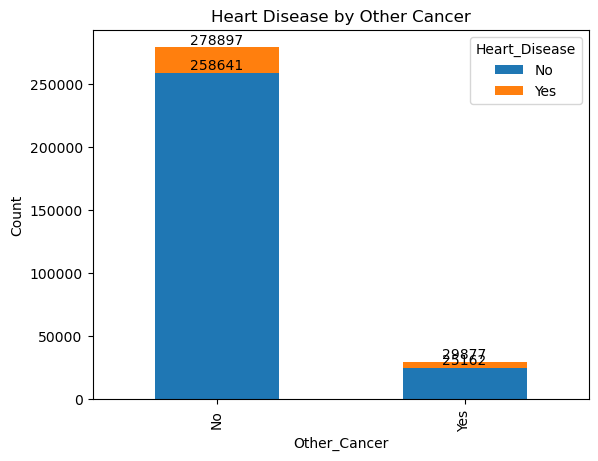

In [23]:
OCCount = df.groupby(['Other_Cancer', 'Heart_Disease']).size().unstack()

ax = OCCount.plot(kind='bar', stacked=True)

# menambah label untuk masing-masing segmen
for container in ax.containers:
    ax.bar_label(container)

# mengatur judul barchart, label x, dan label y
ax.set_xlabel('Other_Cancer')
ax.set_ylabel('Count')
ax.set_title('Heart Disease by Other Cancer')

plt.show()

In [24]:
OCCount

Heart_Disease,No,Yes
Other_Cancer,,
No,258641,20256
Yes,25162,4715


> Berdasarkan stacked bar chart di atas, dapat dilihat bahwa sebanyak 258641 dari 278897 orang yang tidak mengidap kanker (selain kanker kulit), atau 92.74%, tidak mengidap penyakit jantung, dan sisanya mengidap penyakit jantung. Sedangkan mereka yang mengidap kanker (selain kanker kulit), sebanyak 25162 dari 29887, atau 84.19%, tidak mengidap penyakit jantung, dan sisanya mengidap penyakit jantung.

Berdasarkan perbandingan seseorang mengidap kanker (selain kanker kulit) atau tidak, persentase mereka yang tidak mengidap penyakit jantung lebih tinggi adalah mereka yang tidak mengidap kanker (selain kanker kulit).

### Heart Disease berdasarkan Depression

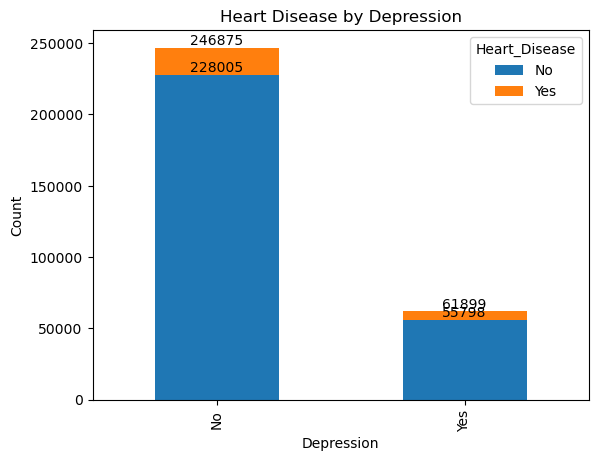

In [25]:
DCount = df.groupby(['Depression', 'Heart_Disease']).size().unstack()

ax = DCount.plot(kind='bar', stacked=True)

# menambah label untuk masing-masing segmen
for container in ax.containers:
    ax.bar_label(container)

# mengatur judul barchart, label x, dan label y
ax.set_xlabel('Depression')
ax.set_ylabel('Count')
ax.set_title('Heart Disease by Depression')

plt.show()

In [26]:
DCount

Heart_Disease,No,Yes
Depression,,
No,228005,18870
Yes,55798,6101


> Berdasarkan stacked bar chart di atas, dapat dilihat bahwa sebanyak 228005 dari 246875 orang yang tidak mengidap depresi, atau 92.4%, tidak mengidap penyakit jantung, dan sisanya mengidap penyakit jantung. Sedangkan mereka yang mengidap depresi, sebanyak 55792 dari 61899, atau 90.13%, tidak mengidap penyakit jantung, dan sisanya mengidap penyakit jantung.

Berdasarkan perbandingan seseorang mengidap depresi atau tidak, persentase mereka yang tidak mengidap penyakit jantung tidak jauh berbeda (92.4% dan 90.13%).

### Heart Disease berdasarkan Diabetes

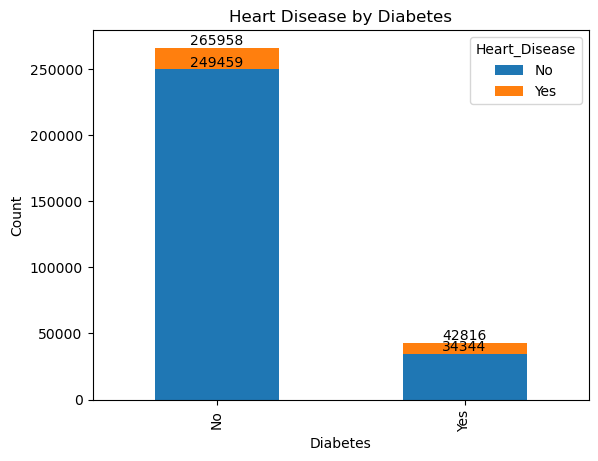

In [27]:
DiCount = df.groupby(['Diabetes', 'Heart_Disease']).size().unstack()

ax = DiCount.plot(kind='bar', stacked=True)

# menambah label untuk masing-masing segmen
for container in ax.containers:
    ax.bar_label(container)

# mengatur judul barchart, label x, dan label y
ax.set_xlabel('Diabetes')
ax.set_ylabel('Count')
ax.set_title('Heart Disease by Diabetes')

plt.show()

In [28]:
DiCount

Heart_Disease,No,Yes
Diabetes,,
No,249459,16499
Yes,34344,8472


> Berdasarkan stacked bar chart di atas, dapat dilihat bahwa sebanyak 249459 dari 265958 orang yang tidak mengidap diabetes, atau 93.8%, tidak mengidap penyakit jantung, dan sisanya mengidap penyakit jantung. Sedangkan mereka yang mengidap diabetes, sebanyak 34344 dari 42816, atau 80.21%, tidak mengidap penyakit jantung, dan sisanya mengidap penyakit jantung.

Berdasarkan perbandingan seseorang mengidap diabetes atau tidak, persentase mereka yang tidak mengidap penyakit jantung lebih tinggi adalah mereka yang tidak mengidap diabetes.

### Heart Disease berdasarkan Arthritis

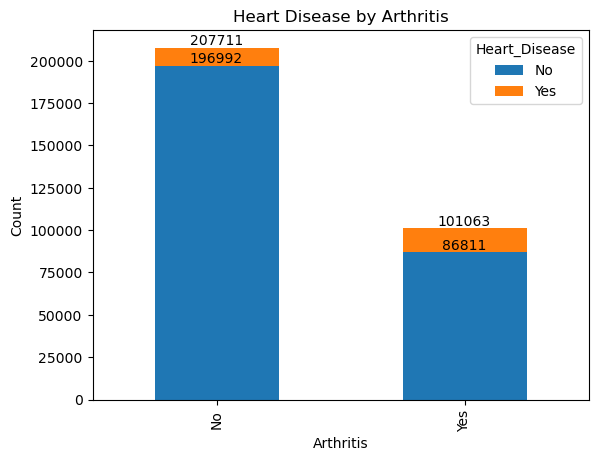

In [29]:
ACount = df.groupby(['Arthritis', 'Heart_Disease']).size().unstack()

ax = ACount.plot(kind='bar', stacked=True)

# menambah label untuk masing-masing segmen
for container in ax.containers:
    ax.bar_label(container)

# mengatur judul barchart, label x, dan label y
ax.set_xlabel('Arthritis')
ax.set_ylabel('Count')
ax.set_title('Heart Disease by Arthritis')

plt.show()

In [30]:
ACount

Heart_Disease,No,Yes
Arthritis,,
No,196992,10719
Yes,86811,14252


> Berdasarkan stacked bar chart di atas, dapat dilihat bahwa sebanyak 196992 dari 207711 orang yang tidak mengidap arthritis, atau 94.84%, tidak mengidap penyakit jantung, dan sisanya mengidap penyakit jantung. Sedangkan mereka yang mengidap arthritis, sebanyak 86811 dari 101063, atau 85.9%, tidak mengidap penyakit jantung, dan sisanya mengidap penyakit jantung.

Berdasarkan perbandingan seseorang mengidap arthritis atau tidak, persentase mereka yang tidak mengidap penyakit jantung lebih tinggi adalah mereka yang tidak mengidap arthritis.

### Heart Disease berdasarkan Sex

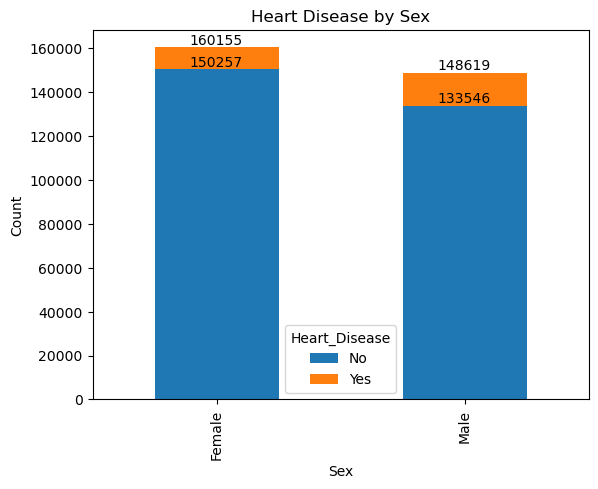

In [31]:
SCount = df.groupby(['Sex', 'Heart_Disease']).size().unstack()

ax = SCount.plot(kind='bar', stacked=True)

# menambah label untuk masing-masing segmen
for container in ax.containers:
    ax.bar_label(container)

# mengatur judul barchart, label x, dan label y
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Heart Disease by Sex')

plt.show()

In [32]:
SCount

Heart_Disease,No,Yes
Sex,,
Female,150257,9898
Male,133546,15073


> Berdasarkan stacked bar chart di atas, dapat dilihat bahwa sebanyak 150257 dari 160155 wanita, atau 93.82%, tidak mengidap penyakit jantung, dan sisanya mengidap penyakit jantung. Sedangkan untuk gender pria, sebanyak 133546 dari 148619, atau 89.86%, orang tidak mengidap penyakit jantung, dan sisanya mengidap penyakit jantung.

Berdasarkan perbandingan antara pria dan wanita, persentase wanita tidak mengidap penyakit jantung sedikit lebih tinggi dari pria.

### Heart Disease berdasarkan Smoking History

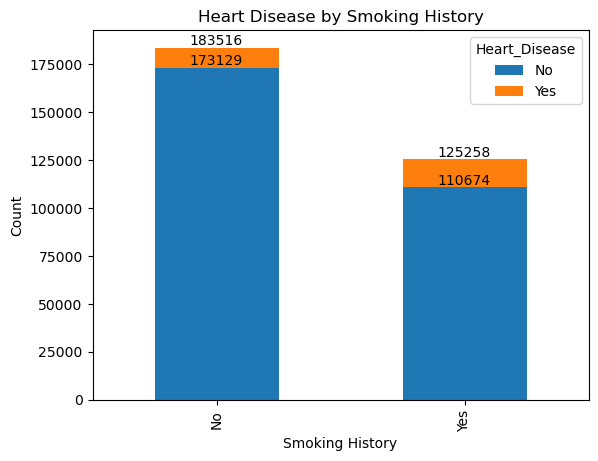

In [33]:
SHCount = df.groupby(['Smoking_History', 'Heart_Disease']).size().unstack()

ax = SHCount.plot(kind='bar', stacked=True)

# menambah label untuk masing-masing segmen
for container in ax.containers:
    ax.bar_label(container)

# mengatur judul barchart, label x, dan label y
ax.set_xlabel('Smoking History')
ax.set_ylabel('Count')
ax.set_title('Heart Disease by Smoking History')

plt.show()

In [34]:
SHCount

Heart_Disease,No,Yes
Smoking_History,,
No,173129,10387
Yes,110674,14584


> Berdasarkan stacked bar chart di atas, dapat dilihat bahwa sebanyak 173129 dari 183516 orang yang tidak merokok, atau 94.34%, tidak mengidap penyakit jantung, dan sisanya mengidap penyakit jantung. Sedangkan mereka yang merokok, sebanyak 110674 dari 125258, atau 88.36%, tidak mengidap penyakit jantung, dan sisanya mengidap penyakit jantung.

Berdasarkan perbandingan seseorang merokok atau tidak, persentase mereka yang tidak mengidap penyakit jantung lebih tinggi adalah mereka yang tidak merokok.

## Korelasi

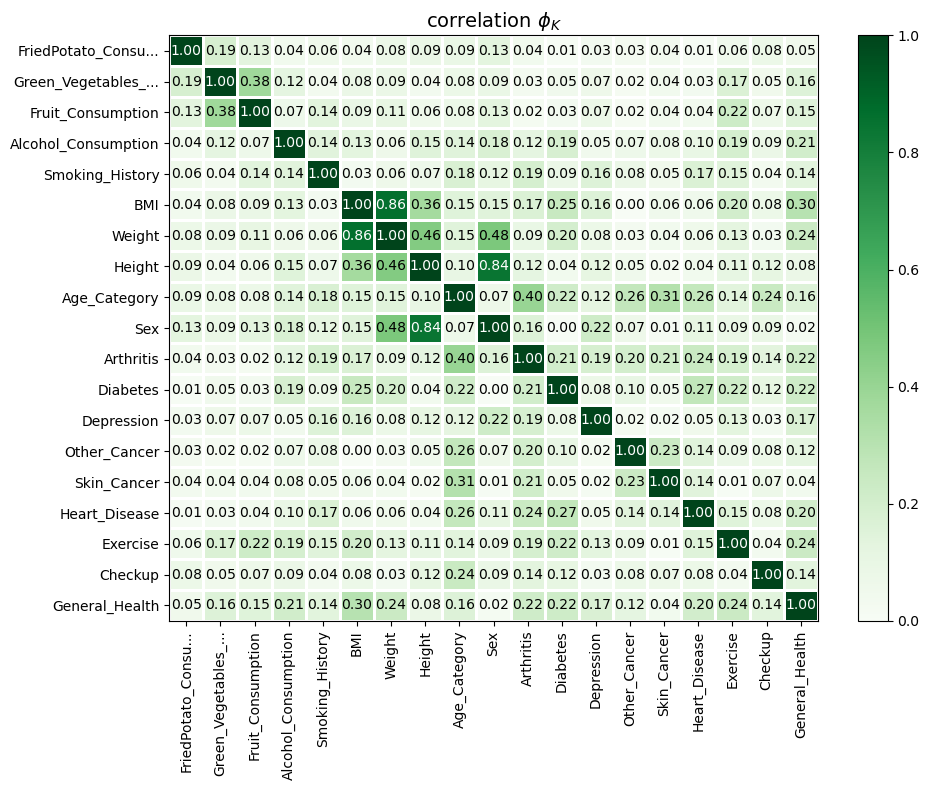

In [35]:
interval_cols = ['Height', 'Weight', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

phik_overview = df.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=1,
                        figsize=(10, 8))
plt.tight_layout()

Berdasarkan matriks korelasi di atas, dapat dilihat bahwa kolom `FriedPotato_Consumption`, `Green_Vegetables_Consumption`, `Fruit_Consumption`, `BMI`, `Weight`, `Height`, `Depression`, dan `Checkup` tidak memiliki korelasi dengan diagnosis seseorang mengidap penyakit jantung atau tidak.

---

# v. Feature Engineering

## Splitting Features dan Target
> Tahap ini memuat proses pemisahan features dengan target. Di mana pada dataset ini, features merupakan seluruh kolom yang ada kecuali kolom `Heart_Disease`, karena kolom `Heart_Disease` merupakan target pada analisis ini.

In [46]:
X = df.drop(['Heart_Disease'], axis = 1)    #features (X) terdiri tadi seluruh kolom, kecuali kolom 'Heart_Disease'
y = df['Heart_Disease']                     #target (y) pada project ini adalah 'Heart_Disease'

## Feature Selection
> Feature selection dilakukan untuk memilih feature mana yang tepat untuk dimasukkan ke dalam model. Feature selection dapat dilakukan berdasarkan personal judgement, domain dan business knowledge, korelasi, dan VIF (untuk model linear).

### Berdasarkan Korelasi
> Pada bagian ini, akan dilakukan feature selection berdasarkan nilai korelasi. Di mana feature yang tidak berkorelasi dengan target (`Heart_Disease`) akan dihapus, yakni `FriedPotato_Consumption`, `Green_Vegetables_Consumption`, `Fruit_Consumption`, `BMI`, `Weight`, `Height`, `Depression`, `Checkup`. Ada pun nilai korelasi dapat dilihat pada tahap Exploratory Data Analysis (EDA). Namun, menurut suatu artikel (https://www.bhf.org.uk/informationsupport/risk-factors/obesity#:~:text=How%20does%20obesity%20increase%20the%20risk%20of%20heart%20and%20circulatory%20diseases%3F&text=Excess%20weight%20can%20lead%20to,lead%20to%20a%20heart%20attack.), diketahui bahwa obesitas dapat berpengaruh terhadap keputusan seseorang akan mengidap penyakit jantung atau tidak, oleh karena itu, feature `BMI` akan tetap digunakan dalam pemodelan ini karena `BMI` dapat menjadi indikator seseorang obesitas atau tidak.

In [47]:
X = X.drop(['FriedPotato_Consumption', 'Green_Vegetables_Consumption', 'Fruit_Consumption', 'Weight', 'Height', 'Depression', 'Checkup'], axis=1)
X.shape

(308774, 11)

### Berdasarkan Nilai VIF
> Dalam melakukan pemodelan dengan model linear, maka asumsi multikolinearitas harus terpenuhi untuk memastikan tidak adanya hubungan linear antar feature.

In [48]:
XNum = df[['BMI', 'Alcohol_Consumption']]

In [49]:
# membuat function untuk menghitung nilai VIF
def calc_vif(XNum):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = XNum.columns
    vif["VIF"] = [variance_inflation_factor(XNum.values, i) for i in range(XNum.shape[1])]

    return(vif)

In [50]:
calc_vif(XNum)

,variables,VIF
0,BMI,1.323198
1,Alcohol_Consumption,1.323198


Berdasarkan output di atas, terlihat bahwa nilai VIF < 10, artinya tidak terdapat permasalahan multikolinearitas. Sehingga, setelah melakukan feature selection, kini terdapat 11 features yang akan diolah untuk membuat model.

## Splitting Data Train dan Data Test

In [51]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3, random_state = 10, stratify=y)   #perbandingan training dan testing -> 70:30
print('Size X Train', XTrain.shape)
print('Size X Test', XTest.shape)

Size X Train (216141, 11)
Size X Test (92633, 11)


In [52]:
(yTrain.value_counts() / len(yTrain)) * 100

No     91.912687
Yes     8.087313
Name: Heart_Disease, dtype: float64

Berdasarkan output di atas, dapat diketahui bahwa proporsi orang yang tidak terkena penyakit jantung adalah 91.9%, dan 8.1% lainnya mengidap penyakit jantung.

## Cardinality Analysis
> Cardinality analysis dilakukan untuk mengetahui seberapa banyak unique values dari setiap kolom yang bersifat kategorik. Kolom yang memiliki low cardinality akan dibiarkan, tetapi kolom yang cardinalitynya tinggi (memiliki banyak unique values/label) akan dihandle.

In [53]:
print('Number of categories in the variable General_Health          : {}'.format(XTrain['General_Health'].nunique()))
print('Number of categories in the variable Exercise                : {}'.format(XTrain['Exercise'].nunique()))
print('Number of categories in the variable Skin_Cancer             : {}'.format(XTrain['Skin_Cancer'].nunique()))
print('Number of categories in the variable Other_Cancer            : {}'.format(XTrain['Other_Cancer'].nunique()))
print('Number of categories in the variable Diabetes                : {}'.format(XTrain['Diabetes'].nunique()))
print('Number of categories in the variable Arthritis               : {}'.format(XTrain['Arthritis'].nunique()))
print('Number of categories in the variable Sex                     : {}'.format(XTrain['Sex'].nunique()))
print('Number of categories in the variable Age_Category            : {}'.format(XTrain['Age_Category'].nunique()))
print('Number of categories in the variable Smoking_History         : {}'.format(XTrain['Smoking_History'].nunique()))
print('Total number of data                                         : {}'.format(len(XTrain)))

Number of categories in the variable General_Health          : 5
Number of categories in the variable Exercise                : 2
Number of categories in the variable Skin_Cancer             : 2
Number of categories in the variable Other_Cancer            : 2
Number of categories in the variable Diabetes                : 2
Number of categories in the variable Arthritis               : 2
Number of categories in the variable Sex                     : 2
Number of categories in the variable Age_Category            : 13
Number of categories in the variable Smoking_History         : 2
Total number of data                                         : 216141


Berdasarkan output di atas, dapat dilihat 7 dari 9 kolom kategorik merupakan biner, dan 2 kolom lainnya memiliki unique value masing-masing 5 dan 13. Banyaknya label dari masing-masing kolom tersebut cenderung sedikit mengingat banyaknya data 216141.

## Outlier Detecting
> Pada tahap ini akan dilakukan pendeteksian outlier pada feature numerik.

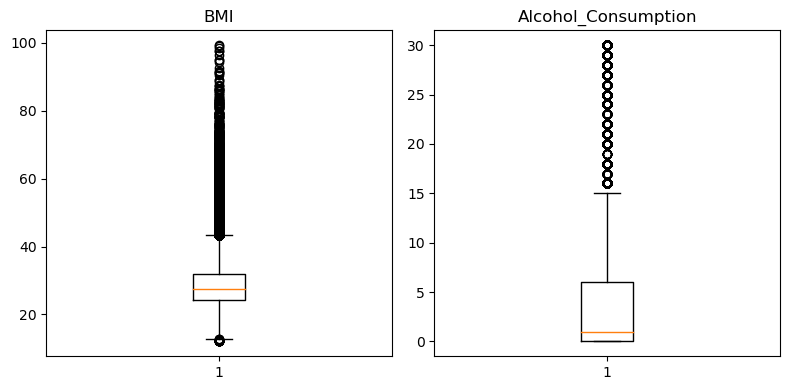

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs = axs.flatten()

for i, col in enumerate(XTrain[['BMI', 'Alcohol_Consumption']]):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

## Feature Transformation & Outlier Handling

In [55]:
numCol1 = ['BMI']                                                                                       #kolom numerik dengan outliers diluar lower dan upper bound
num1_pipeline = make_pipeline(Winsorizer(capping_method='iqr', tail='both', fold=1.5),                  #outlier handling pada feature numerik dengan Winsorizer
                             RobustScaler())                                                            #scaling feature numerik dengan RobustScaler()

numCol2 = ['Alcohol_Consumption']                                                                       #kolom numerik dengan outliers hanya diluar upper bound
num2_pipeline = make_pipeline(Winsorizer(capping_method='iqr', tail='right', fold=1.5),                 #outlier handling pada feature numerik dengan Winsorizer
                             RobustScaler())                                                            #scaling feature numerik dengan RobustScaler()

nomCol = ['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis','Sex', 'Smoking_History']  #kolom berskala nominal
nom_pipeline = make_pipeline(OneHotEncoder())                                                           #encoding feature nominal dengan OneHotEncoder()

ordCol = ['General_Health', 'Age_Category']                                                             #kolom berskala ordinal
ordOrder = [['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'],                                         #order/urutan dari kolom `General_Health`
            ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']]    #order/urutan dari kolom `Age_Category`
ord_pipeline = make_pipeline(OrdinalEncoder(categories=ordOrder))                                       #encoding feature ordinal dengan OrdinalEncoder()

prep = ColumnTransformer([                                                                              #transformasi feature
    ('numerik: BMI', num1_pipeline, numCol1),
    ('numerik: Alcohol_Consumption', num2_pipeline, numCol2),
    ('nominal', nom_pipeline, nomCol),
    ('ordinal', ord_pipeline, ordCol)])
prep

ColumnTransformer(transformers=[('numerik: BMI',
                                 Pipeline(steps=[('winsorizer',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both')),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['BMI']),
                                ('numerik: Alcohol_Consumption',
                                 Pipeline(steps=[('winsorizer',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5)),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['Alcohol_Consumption']),
                                ('nominal',
                                 P...
                                 ['Exercise', 'Skin_Cancer', 'Other_Cancer',
                                  'Diabetes', 'Arthritis', 'Sex',
                                  'Smoking_History']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Poor',
                                                                              'Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Excellent'],
                                                                             ['18-24',
                                                                              '25-29',
                                                                              '30-34',
                                                                              '35-39',
                                                                              '40-44',
                                                                              '45-49',
                                                                              '50-54',
                                                                              '55-59',
                                                                              '60-64',
                                                                              '65-69',
                                                                              '70-74',
                                                                              '75-79',
                                                                              '80+']]))]),
                                 ['General_Health', 'Age_Category'])])

## Label Encoding

In [56]:
labelEncoder = LabelEncoder()

yTrain_encoded = labelEncoder.fit_transform(yTrain)
yTest_encoded = labelEncoder.transform(yTest)

## Data Balancing
> Balancing data digunakan untuk menghandle imbalanced data. Seperti yang sudah dibahas pada EDA, diketahui bahwa dataset yang dimiliki merupakan imbalanced data. Sehingga label yang dominan/mayoritas ('No') akan dikurangi agar data lebih seimbang. Hal ini akan dilakukan dengan under-sampling menggunakan RandomUnderSampler() karena dataset yang dimiliki cukup besar. 

In [57]:
rus = RandomUnderSampler()
XTrain_balanced, yTrain_balanced = rus.fit_resample(XTrain,yTrain_encoded)

In [58]:
yTrain_balanced = pd.Series(yTrain_balanced)

print('yTrain')
print(yTrain.value_counts())
print('')
print('yTrain_balanced')
print(yTrain_balanced.value_counts())

yTrain
No     198661
Yes     17480
Name: Heart_Disease, dtype: int64

yTrain_balanced
0    17480
1    17480
dtype: int64


Berdasarkan informasi di atas, setelah melakukan handling imbalanced data, kini banyaknya entries untuk masing-masing label pada target sama, yaitu 198661. Artinya data sudah balance.

---

# vi. Model Definition
> Pada analisis ini akan dibuat baseline model menggunakan KNN, SVM, Decision Tree, Random Forest, dan AdaBoosting yang nantinya akan dipilih 1 algoritma yang terbaik.

In [59]:
# KNN
knn = make_pipeline(prep, KNeighborsClassifier())

# SVM
svm = make_pipeline(prep, SVC(random_state=10))

# Decision Tree
dt = make_pipeline(prep, DecisionTreeClassifier(random_state=10))

# Random Forest
rf = make_pipeline(prep, RandomForestClassifier(random_state=10))

# AdaBoosting
ab = make_pipeline(prep, AdaBoostClassifier(random_state=10))

# vii. Model Training

In [60]:
# KNN
knn.fit(XTrain_balanced, yTrain_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerik: BMI',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['BMI']),
                                                 ('numerik: '
                                                  'Alcohol_Consumption',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]...
                                                   'Arthritis', 'Sex',
                                                   'Smoking_History']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Poor',
                                                                                               'Fair',
                                                                                               'Good',
                                                                                               'Very '
                                                                                               'Good',
                                                                                               'Excellent'],
                                                                                              ['18-24',
                                                                                               '25-29',
                                                                                               '30-34',
                                                                                               '35-39',
                                                                                               '40-44',
                                                                                               '45-49',
                                                                                               '50-54',
                                                                                               '55-59',
                                                                                               '60-64',
                                                                                               '65-69',
                                                                                               '70-74',
                                                                                               '75-79',
                                                                                               '80+']]))]),
                                                  ['General_Health',
                                                   'Age_Category'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [61]:
# SVM
svm.fit(XTrain_balanced, yTrain_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerik: BMI',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['BMI']),
                                                 ('numerik: '
                                                  'Alcohol_Consumption',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]...
                                                   'Other_Cancer', 'Diabetes',
                                                   'Arthritis', 'Sex',
                                                   'Smoking_History']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Poor',
                                                                                               'Fair',
                                                                                               'Good',
                                                                                               'Very '
                                                                                               'Good',
                                                                                               'Excellent'],
                                                                                              ['18-24',
                                                                                               '25-29',
                                                                                               '30-34',
                                                                                               '35-39',
                                                                                               '40-44',
                                                                                               '45-49',
                                                                                               '50-54',
                                                                                               '55-59',
                                                                                               '60-64',
                                                                                               '65-69',
                                                                                               '70-74',
                                                                                               '75-79',
                                                                                               '80+']]))]),
                                                  ['General_Health',
                                                   'Age_Category'])])),
                ('svc', SVC(random_state=10))])

In [62]:
# Decision Tree
dt.fit(XTrain_balanced, yTrain_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerik: BMI',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['BMI']),
                                                 ('numerik: '
                                                  'Alcohol_Consumption',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]...
                                                   'Smoking_History']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Poor',
                                                                                               'Fair',
                                                                                               'Good',
                                                                                               'Very '
                                                                                               'Good',
                                                                                               'Excellent'],
                                                                                              ['18-24',
                                                                                               '25-29',
                                                                                               '30-34',
                                                                                               '35-39',
                                                                                               '40-44',
                                                                                               '45-49',
                                                                                               '50-54',
                                                                                               '55-59',
                                                                                               '60-64',
                                                                                               '65-69',
                                                                                               '70-74',
                                                                                               '75-79',
                                                                                               '80+']]))]),
                                                  ['General_Health',
                                                   'Age_Category'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=10))])

In [63]:
# Random Forest
rf.fit(XTrain_balanced, yTrain_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerik: BMI',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['BMI']),
                                                 ('numerik: '
                                                  'Alcohol_Consumption',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]...
                                                   'Smoking_History']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Poor',
                                                                                               'Fair',
                                                                                               'Good',
                                                                                               'Very '
                                                                                               'Good',
                                                                                               'Excellent'],
                                                                                              ['18-24',
                                                                                               '25-29',
                                                                                               '30-34',
                                                                                               '35-39',
                                                                                               '40-44',
                                                                                               '45-49',
                                                                                               '50-54',
                                                                                               '55-59',
                                                                                               '60-64',
                                                                                               '65-69',
                                                                                               '70-74',
                                                                                               '75-79',
                                                                                               '80+']]))]),
                                                  ['General_Health',
                                                   'Age_Category'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=10))])

In [64]:
# AdaBoosting
ab.fit(XTrain_balanced, yTrain_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerik: BMI',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['BMI']),
                                                 ('numerik: '
                                                  'Alcohol_Consumption',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]...
                                                   'Arthritis', 'Sex',
                                                   'Smoking_History']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Poor',
                                                                                               'Fair',
                                                                                               'Good',
                                                                                               'Very '
                                                                                               'Good',
                                                                                               'Excellent'],
                                                                                              ['18-24',
                                                                                               '25-29',
                                                                                               '30-34',
                                                                                               '35-39',
                                                                                               '40-44',
                                                                                               '45-49',
                                                                                               '50-54',
                                                                                               '55-59',
                                                                                               '60-64',
                                                                                               '65-69',
                                                                                               '70-74',
                                                                                               '75-79',
                                                                                               '80+']]))]),
                                                  ['General_Health',
                                                   'Age_Category'])])),
                ('adaboostclassifier', AdaBoostClassifier(random_state=10))])

# viii. Model Evaluation

In [65]:
skfold=StratifiedKFold(n_splits=5)
custom_recall_scorer = make_scorer(recall_score, pos_label=1)

# checking cross validation score
cv_knn_model = cross_val_score(knn, XTrain_balanced, yTrain_balanced, cv=skfold, scoring=custom_recall_scorer)
cv_svm_model = cross_val_score(svm, XTrain_balanced, yTrain_balanced, cv=skfold, scoring=custom_recall_scorer)
cv_dt_model = cross_val_score(dt, XTrain_balanced, yTrain_balanced, cv=skfold, scoring=custom_recall_scorer)
cv_rf_model = cross_val_score(rf, XTrain_balanced, yTrain_balanced, cv=skfold, scoring=custom_recall_scorer)
cv_ab_model = cross_val_score(ab, XTrain_balanced, yTrain_balanced, cv=skfold, scoring=custom_recall_scorer)
name_model = []
cv_scores=0
for cv,name in zip([cv_knn_model, cv_svm_model, cv_dt_model, cv_rf_model, cv_ab_model],['knn','svm', 'dt', 'rf', 'ab']):
    print(name)
    print('recall score - All - Cross Validation  : ', cv)
    print('recall score - Mean - Cross Validation : ', cv.mean())
    print('recall score - Std - Cross Validation  : ', cv.std())
    print('recall score - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

knn
recall score - All - Cross Validation  :  [0.73083524 0.74113272 0.75371854 0.74685355 0.75143021]
recall score - Mean - Cross Validation :  0.7447940503432495
recall score - Std - Cross Validation  :  0.008199758749276361
recall score - Range of Test-Set       :  0.7365942915939732 - 0.7529938090925259
--------------------------------------------------
svm
recall score - All - Cross Validation  :  [0.83094966 0.83295195 0.83867277 0.83438215 0.84181922]
recall score - Mean - Cross Validation :  0.8357551487414188
recall score - Std - Cross Validation  :  0.0039527539290903375
recall score - Range of Test-Set       :  0.8318023948123284 - 0.8397079026705091
--------------------------------------------------
dt
recall score - All - Cross Validation  :  [0.64387872 0.66590389 0.65789474 0.66332952 0.65961098]
recall score - Mean - Cross Validation :  0.6581235697940503
recall score - Std - Cross Validation  :  0.007652657704260423
recall score - Range of Test-Set       :  0.650470912

|            | Predicted Heart Disease | Predicted Not Heart Disease |
|------------|-------------------|-------------------|
| Actual Heart Disease | True Positive     | False Negative    |
| Actual Not Heart Disease | False Positive    | True Negative     |

Pada kasus ini,
- `True Positive` merupakan orang yang diprediksi mengidap penyakit jantung, dan memang benar orang tersebut mengidap penyakit jantung.
- `False Negative` merupakan orang yang diprediksi tidak mengidap penyakit jantung, padahal sebenarnya orang tersebut mengidap penyakit jantung.
- `False Positive` merupakan orang yang diprediksi mengidap penyakit jantung, padahal sebenarnya orang tersebut tidak mengidap penyakit jantung.
- `True Negative` merupakan orang yang diprediksi tidak mengidap penyakit jantung, dan memang benar orang tersebut tidak mengidap penyakit jantung.

Untuk meminimalisir `False Negative`, model dapat dievaluasi dengan melihat nilai `recall`nya karena `recall` merupakan perbandingan antara _True Positive_ (data yang secara benar diprediksi mengidap penyakit jantung) dengan banyaknya data aktual yang mengidap penyakit jantung (_True Positive + False Negative_).

Berdasarkan informasi di atas, dapat dilihat bahwa rata-rata nilai `recall` terbaik diperoleh dengan menggunakan algoritma SVM, di mana rata-rata recallnya adalah 83.58%. Artinya model dapat memprediksi dengan benar seseorang mengidap penyakit jantung sebesar 83.58%.

## SVM Model Improvement

### Hyperparameter Tuning

In [66]:
# random search
params_svm = {
    'svc__kernel':['poly', 'rbf'],
    'svc__degree':[2, 3],
    'svc__C':[0.1, 1, 10],
    'svc__gamma':[0.1, 1, 10],
    'svc__coef0':[0.1, 1, 10]}

random_svm = RandomizedSearchCV(estimator=svm, param_distributions=params_svm, cv=3, n_jobs=-1, verbose=10, n_iter=2, scoring='recall')
random_svm.fit(XTrain_balanced, yTrain_balanced)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('numerik: '
                                                                               'BMI',
                                                                               Pipeline(steps=[('winsorizer',
                                                                                                Winsorizer(capping_method='iqr',
                                                                                                           fold=1.5,
                                                                                                           tail='both')),
                                                                                               ('robustscaler',
                                                                                                RobustScaler())]),
                                                                               ['BMI']),
                                                                              ('numerik: '
                                                                               'Alcohol_Consumption',
                                                                               Pipeline(steps=[('winsorizer',
                                                                                                Winsorizer(capping_method='iqr',
                                                                                                           fold=1....
                                                                                                                            '25-29',
                                                                                                                            '30-34',
                                                                                                                            '35-39',
                                                                                                                            '40-44',
                                                                                                                            '45-49',
                                                                                                                            '50-54',
                                                                                                                            '55-59',
                                                                                                                            '60-64',
                                                                                                                            '65-69',
                                                                                                                            '70-74',
                                                                                                                            '75-79',
                                                                                                                            '80+']]))]),
                                                                               ['General_Health',
                                                                                'Age_Category'])])),
                                             ('svc', SVC(random_state=10))]),
                   n_iter=2, n_jobs=-1,
                   param_distributions={'svc__C': [0.1, 1, 10],
                                        'svc__coef0': [0.1, 1, 10],
                                        'svc__degree': [2, 3],
                                        'svc__gamma': [0.1, 1, 10],
                                        'svc__kernel': ['poly', 'rbf']},
                   scoring='recall', verbose=10)

In [67]:
random_svm.best_params_

{'svc__kernel': 'rbf',
 'svc__gamma': 0.1,
 'svc__degree': 2,
 'svc__coef0': 0.1,
 'svc__C': 0.1}

In [68]:
svm_best = random_svm.best_estimator_
svm_best

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerik: BMI',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['BMI']),
                                                 ('numerik: '
                                                  'Alcohol_Consumption',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('robustscaler',
                                                                   RobustScaler())]...
                                                   'Smoking_History']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Poor',
                                                                                               'Fair',
                                                                                               'Good',
                                                                                               'Very '
                                                                                               'Good',
                                                                                               'Excellent'],
                                                                                              ['18-24',
                                                                                               '25-29',
                                                                                               '30-34',
                                                                                               '35-39',
                                                                                               '40-44',
                                                                                               '45-49',
                                                                                               '50-54',
                                                                                               '55-59',
                                                                                               '60-64',
                                                                                               '65-69',
                                                                                               '70-74',
                                                                                               '75-79',
                                                                                               '80+']]))]),
                                                  ['General_Health',
                                                   'Age_Category'])])),
                ('svc',
                 SVC(C=0.1, coef0=0.1, degree=2, gamma=0.1, random_state=10))])

### Model Evaluation setelah Hyperparameter Tuning

In [69]:
yPredTrain_random_svm = random_svm.predict(XTrain_balanced)
yPredTest_random_svm = random_svm.predict(XTest)

In [70]:
print('svm evaluation train score')
print(classification_report(yTrain_balanced, yPredTrain_random_svm))
print('svm evaluation test score')
print(classification_report(yTest_encoded, yPredTest_random_svm))

svm evaluation train score
              precision    recall  f1-score   support

           0       0.81      0.68      0.74     17480
           1       0.72      0.84      0.78     17480

    accuracy                           0.76     34960
   macro avg       0.77      0.76      0.76     34960
weighted avg       0.77      0.76      0.76     34960

svm evaluation test score


              precision    recall  f1-score   support

           0       0.98      0.68      0.80     85142
           1       0.19      0.83      0.31      7491

    accuracy                           0.69     92633
   macro avg       0.58      0.76      0.55     92633
weighted avg       0.91      0.69      0.76     92633



Berdasarkan hasil di atas, dapat dilihat bahwa setelah dilakukan hyperparameter tuning, nilai `recall` pada data train sedikit meningkat dari 83.58% menjadi 84%. Artinya, model SVM dengan parameter `C = 0.1`, `coef0 = 0.1`, `gamma = 0.1` dapat memprediksi dengan benar seseorang mengidap penyakit jantung sebesar 84%. Adapun pada data test, diperoleh nilai `recall` sebesar 83%. Artinya model SVM dapat memprediksi dengan benar seseorang mengidap penyakit jantung sebesar 83%.

Selain itu, informasi di atas menunjukkan bahwa hasil performa model SVM cenderung best fit karena selisih nilai `recall` pada data train dan data test hanya 1%.

---

# ix. Model Saving

In [71]:
with open('best_svm.pkl', 'wb') as model:
  pickle.dump(svm_best, model)

# x. Model Inference
> Model Inference akan dilakukan pada file P1M2_nadia_nabilla_inf.ipynb'

# xi. Kesimpulan

Setelah melakukan pemodelan untuk memprediksi apakah seseorang mengidap penyakit jantung atau tidak, diperoleh 1 model terbaik, yaitu SVM. Kemudian untuk mendapatkan performa model SVM yang lebih baik, dilakukan hyperparameter tuning untuk mengetahui hyperparameter apa saja yang digunakan agar menghasilkan performa yang baik. Dan diketahui model SVM yang terbaik dalam memprediksi seseorang mengidap penyakit jantung atau tidak adalah model SVM dengan `kernel = RBF`, `C = 0.1`, `coef0 = 0.1`, dan `gamma = 0.1`. Setelah dilakukan hyperparameter tuning, diperoleh nilai recall pada masing-masing data train dan data test adalah 84% dan 83%.

---

# Conceptual Problems

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging!

Bagging merupakan Bootstrap Aggregating, yang berarti metode ini merupakan gabungan Bootstraping dan Aggregation dalam satu model. Bagging dilakukan dengan melatih beberapa model secara independen pada subset data train yang berbeda. Kemudian hasil prediksi dari masing-masing model digabungkan (bisa dengan rata-rata atau modus)

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih!

Random Forest merupakan salah satu contoh dari algoritma bagging, sehingga masing-masing `tree` (subset) data train akan dilatih secara independen.

Sedangkan AdaBoost, melatih data secara sequential dengan memberikan bobot lebih besar pada data yang misclassified dari model sebelumnya. Artinya, model ini akan memfokuskan pada data yang sulit diprediksi oleh model sebelumnya.

3. Jelaskan apa yang dimaksud dengan Cross Validation!

Cross Validation merupakan suatu metode untuk mengestimasi performa model terhadap data yang tidak terlihat. Cross Validation akan menghasilkan rata-rata dan standard deviasi dari skor evaluasi (contoh: Recall).

Cross Validation dilakukan dengan membagi data train menjadi `k` folds, kemudian model akan di-train dan dievaluasi sebanyak `k` kali, dan hasil evaluasi akan dirata-ratakan sebagai estimasi dari performa model.